# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [9]:
# Dependencies and Setup
import hvplot.pandas
import requests
import matplotlib.pyplot as plt
import pandas as pd

# Import API key
geoapify_key = 'fa95fda150924c86aabe611cbd355177'

In [8]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv(r"C:\Users\kevin\Documents\Starter_Code\output_data\cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

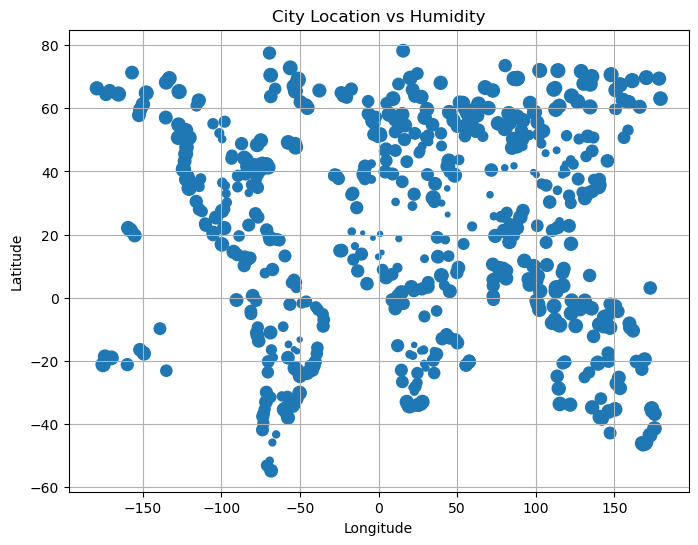

In [10]:
%%capture --no-display

# Configure the map plot
city_data_df = pd.read_csv(r"C:\Users\kevin\Documents\Starter_Code\output_data\cities.csv")
plt.figure(figsize=(8,6))

# Display the map
plt.scatter(city_data_df['Lng'], city_data_df['Lat'], s=city_data_df['Humidity'])
plt.title('City Location vs Humidity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [27]:
# Narrow down cities that fit criteria and drop any results with null values
ideal_weather_df = city_data_df.loc[(city_data_df['Wind Speed'] < 4.5) & 
                                    (city_data_df['Cloudiness'] == 0) & 
                                    (city_data_df['Max Temp'] > 21) & 
                                    (city_data_df['Max Temp'] < 27)]

# Drop any rows with null values
ideal_weather_df = ideal_weather_df.dropna()

# Display sample data
ideal_weather_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
45,45,kapaa,22.0752,-159.3190,22.99,84,0,3.60,US,1666108257
51,51,hilo,19.7297,-155.0900,26.27,83,0,2.57,US,1666108260
63,63,banda,25.4833,80.3333,24.62,52,0,2.68,IN,1666108268
81,81,makakilo city,21.3469,-158.0858,21.66,81,0,2.57,US,1666108282
152,152,kahului,20.8947,-156.4700,23.80,60,0,3.09,US,1666108246


### Step 3: Create a new DataFrame called `hotel_df`.

In [25]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = ideal_city_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()


# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ""

# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
0,faya,SA,18.3851,42.4509,35,
1,farsund,NO,58.0948,6.8047,100,
2,new norfolk,AU,-42.7826,147.0587,58,
6,albany,US,42.6001,-73.9662,74,
7,carnarvon,AU,-24.8667,113.6333,76,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [ ]:
# Set parameters to search for a hotel
# Set parameters to search for a hotel
radius = 1000000
params = {
    "apiKey": "fa95fda150924c86aabe611cbd355177", 
    "limit": 1,
    "categories": "lodging",
    "radius": radius,
    "format": "json"
}

# Print a message to start the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get latitude, longitude from the DataFrame
    lat = row['Lat']
    lng = row['Lng']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"point:{lng},{lat}"
    params["bias"] = f"proximity:{lng},{lat}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = response.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df.head()

Starting hotel search
faya - nearest hotel: No hotel found
farsund - nearest hotel: No hotel found
new norfolk - nearest hotel: No hotel found
albany - nearest hotel: No hotel found
carnarvon - nearest hotel: No hotel found
saint-pierre - nearest hotel: No hotel found
trairi - nearest hotel: No hotel found
puerto ayora - nearest hotel: No hotel found
avarua - nearest hotel: No hotel found
guiratinga - nearest hotel: No hotel found
saint-louis - nearest hotel: No hotel found
grimmen - nearest hotel: No hotel found
cape town - nearest hotel: No hotel found
stornoway - nearest hotel: No hotel found
margate - nearest hotel: No hotel found
ancud - nearest hotel: No hotel found
kapaa - nearest hotel: No hotel found
mogadishu - nearest hotel: No hotel found
hobart - nearest hotel: No hotel found
hilo - nearest hotel: No hotel found
lasa - nearest hotel: No hotel found
vaini - nearest hotel: No hotel found
east london - nearest hotel: No hotel found
busselton - nearest hotel: No hotel found
ba

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [7]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)